# Домашнее задание 1: Обработка и анализ изображений

> Цель: Применить базовые методы обработки изображений для улучшения качества и выделения ключевых признаков.



## Задание:


In [2]:
import cv2
from matplotlib import pyplot as plt

IMG_PATH = 'IMG_0864.jpeg'

---
---

### 1. Загрузка и отображение изображения:
- Выберите цветное изображение по вашему выбору (например, природа, архитектура, портрет).
- С помощью библиотек OpenCV или PIL загрузите изображение в программу.
- Отобразите исходное изображение.

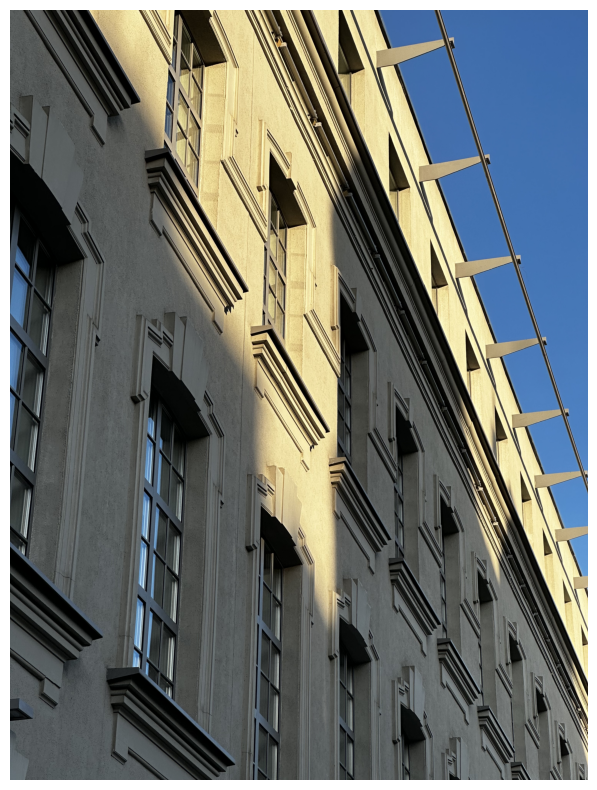

In [3]:
img = cv2.imread(IMG_PATH)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

```
Выбрано изображение здания, которое имеет много прямых линий, а также горизонтальные линии расположены под углом, что может привести к интересным результатам в процессе работы

```

---
---

### 2. Преобразование цветовых пространств:
- Преобразуйте изображение из RGB в Grayscale и HSV.
- Отобразите каждое из полученных изображений.
- Постройте гистограммы яркости для исходного и серого изображений.

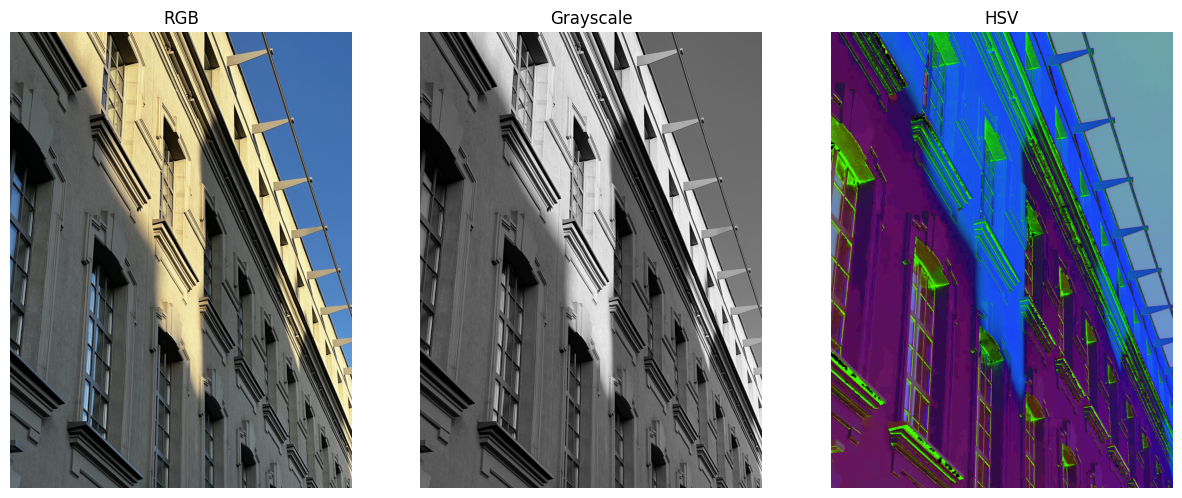

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('RGB')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_hsv)
plt.title('HSV')
plt.axis('off')

plt.show()


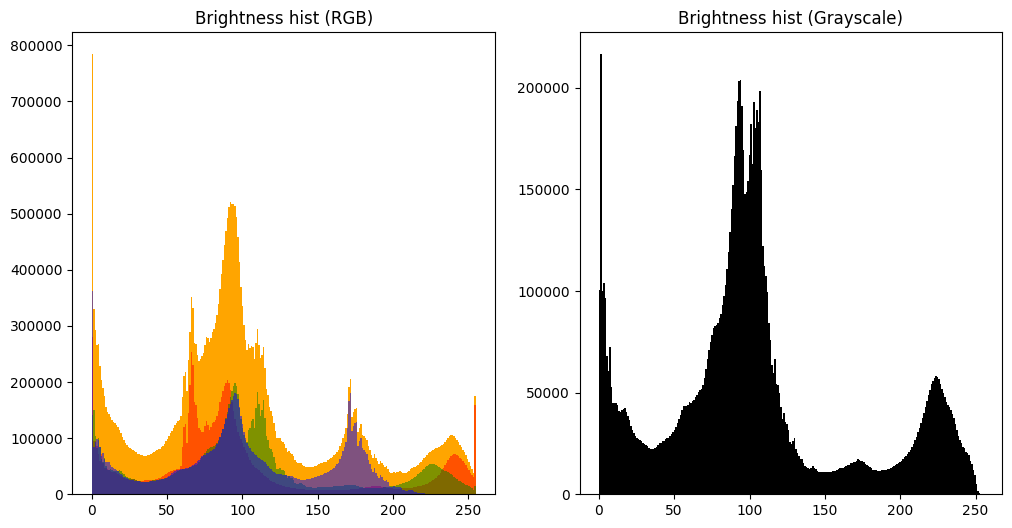

In [35]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(img_rgb.ravel(), bins=256, color='orange', )
plt.hist(img_rgb[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
plt.hist(img_rgb[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
plt.hist(img_rgb[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
plt.title('Brightness hist (RGB)')

plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), bins=256, color='black')
plt.title('Brightness hist (Grayscale)')

plt.show()

```
Что можно сказать по гистограмме:
  - Широкий диапазон яркостей и наличие значимых пиков как в области темных, так и светлых оттенков говорит о высоком контрасте изображения.
  - Наличие значений по всему диапазону говорит о том, что изображение достаточно насыщенное и разнообразное.
  - Но обеих гистограммах отчетливо видны 4 пика с самыми распространенными уровнями яркости

```

### 3. Фильтрация изображений:
- Примените к серому изображению следующие фильтры:
    - Гауссово сглаживание с разными значениями σ (сигма).
    - Медианный фильтр с разными размерами ядра.
    - Фильтр Лапласа для повышения резкости.
- Отобразите результаты фильтрации и сравните их визуально.

In [36]:
print(f'Image shape: {img_gray.shape}')

Image shape: (4032, 3024)


```
Так как изображение достаточно большое во многих операциях взяты достаточно большие ядра, чтобы был заметен результат
```

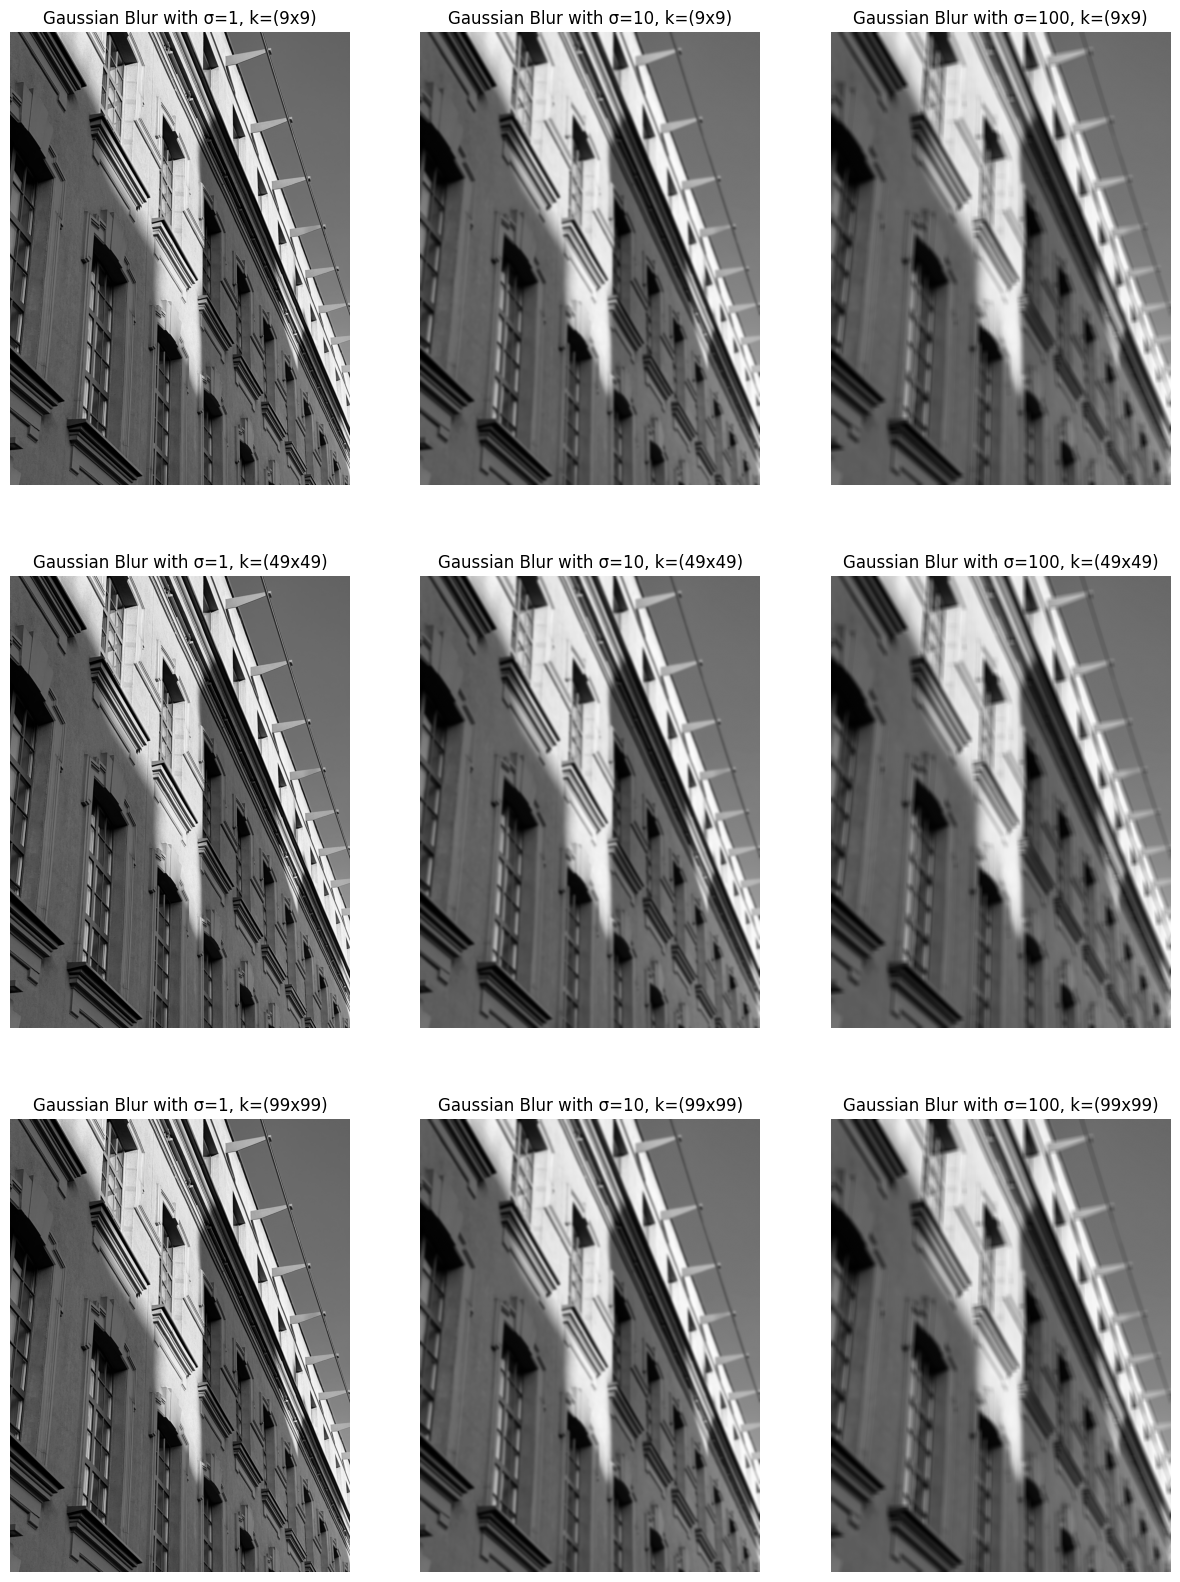

In [38]:
plt.figure(figsize=(15, 20))
for j, ksize in enumerate([9, 49, 99]):
    for i, sigma in enumerate([1,10,100]):
        plt.subplot(3, 3, 3*j+1+i)
        gaussian_blur = cv2.GaussianBlur(img_gray, (49, 49), sigmaX=sigma)
        plt.imshow(gaussian_blur, cmap='gray')
        plt.title(f'Gaussian Blur with σ={sigma}, k=({ksize}x{ksize})')
        plt.axis('off')
plt.show()


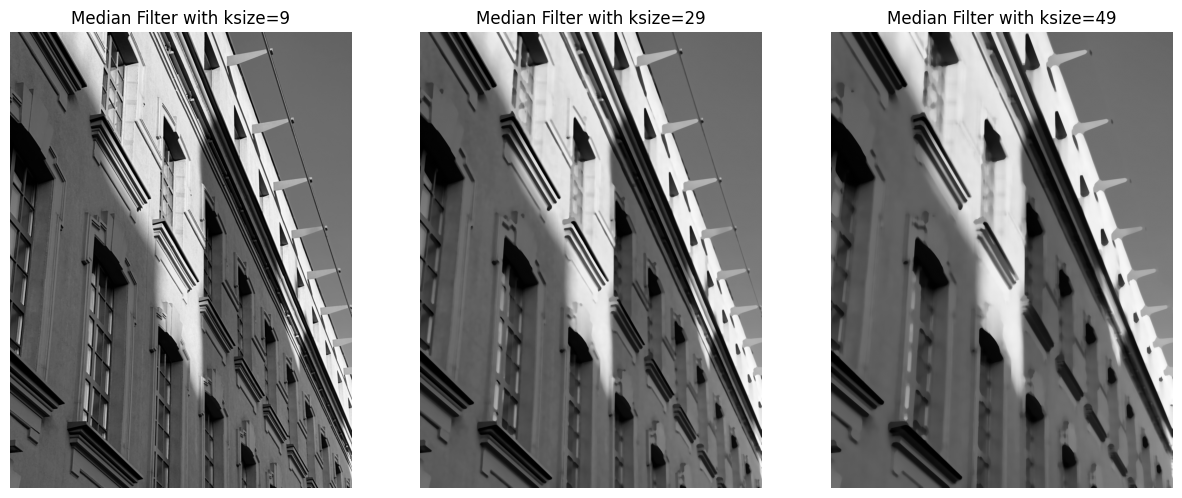

In [48]:
plt.figure(figsize=(15, 7))
for i, ksize in enumerate([9,29,49]):
    plt.subplot(1, 3, 1+i)
    median_blur = cv2.medianBlur(img_gray, ksize)
    plt.imshow(median_blur, cmap='gray')
    plt.title(f'Median Filter with ksize={ksize}')
    plt.axis('off')
plt.show()

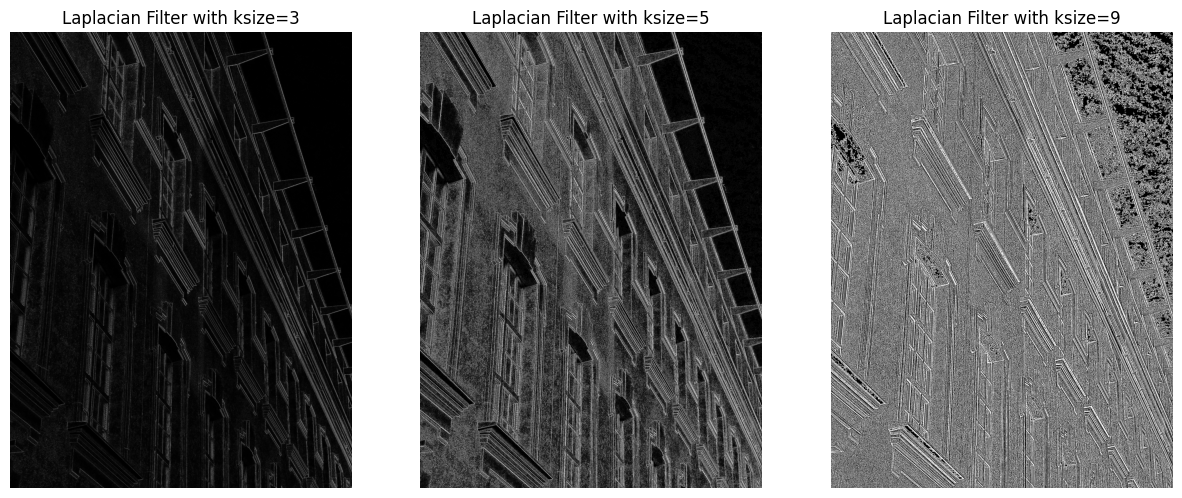

In [41]:
plt.figure(figsize=(15, 7))
for i, ksize in enumerate([3,5,9]):
    plt.subplot(1, 3, 1+i)
    laplacian_image = cv2.Laplacian(img_gray, 0, ksize=ksize)
    plt.imshow(laplacian_image, cmap='gray')
    plt.title(f'Laplacian Filter with ksize={ksize}')
    plt.axis('off')
plt.show()

```
Чем больше размер ядра, тем больше краев подчеркивается и более контрастное может быть изображение
```

----
----

### 4. Выделение краев и углов:
- Используйте оператор Собеля для определения горизонтальных и вертикальных градиентов.
- Примените алгоритм Кэнни для обнаружения краев.
- Используйте детектор углов Harris или Shi-Tomasi для выявления угловых точек.
- Наложите результаты на исходное изображение и отобразите.

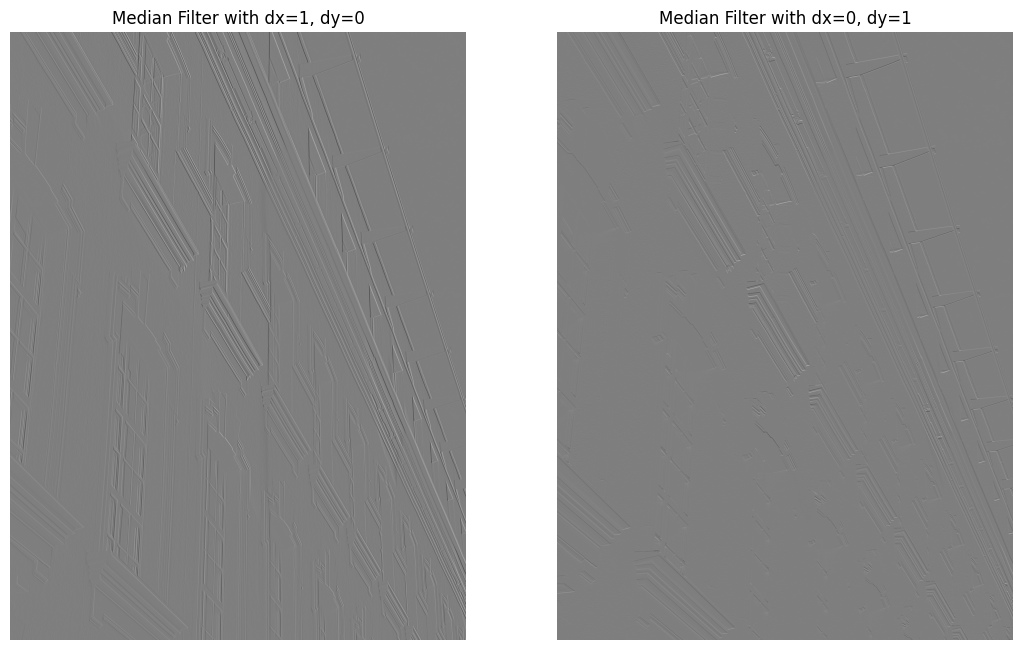

In [13]:
plt.figure(figsize=(20, 10))
for i, dd in enumerate([(1,0),(0,1)]):
    plt.subplot(1, 3, 1+i)
    sobel_mag = cv2.Sobel(img_gray, cv2.CV_64F, dd[0], dd[1], ksize=3) 
    plt.imshow(sobel_mag, cmap='gray')
    plt.title(f'Median Filter with dx={dd[0]}, dy={dd[1]}')
    plt.axis('off')
plt.show()

```
.
Из за большого размера изображения края не видны столь отчетливо, но они есть если приблизить)
.
```

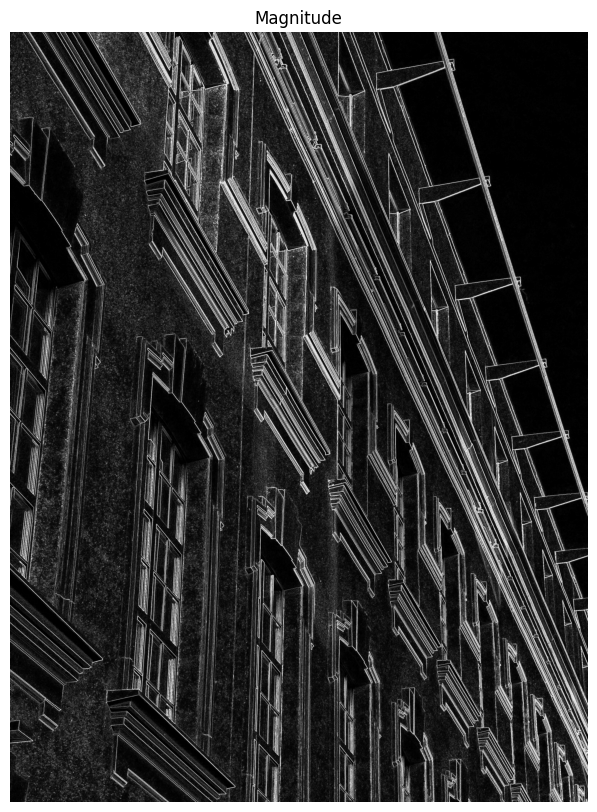

In [6]:
import numpy as np

grad_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
magnitude = cv2.convertScaleAbs(np.sqrt(grad_x**2 + grad_y**2))

plt.figure(figsize=(10, 10))
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude')
plt.axis('off')
plt.show()


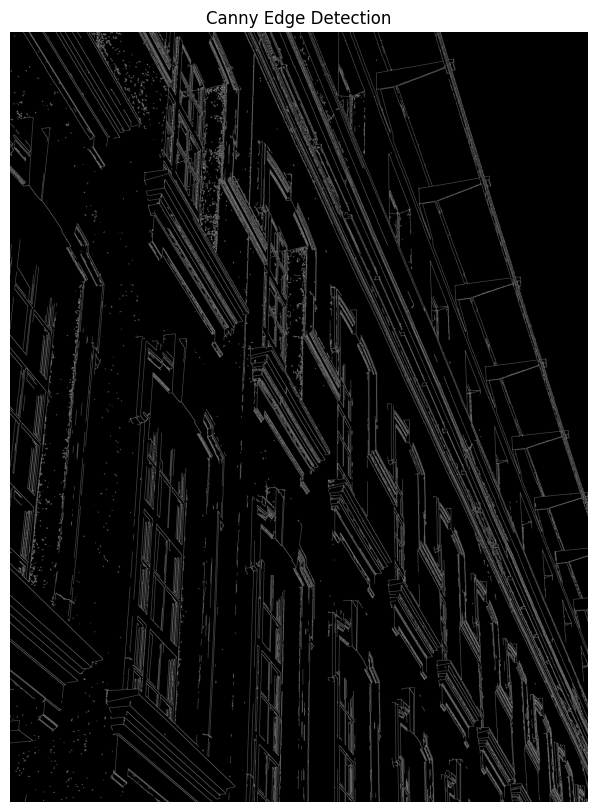

In [5]:
edges = cv2.Canny(img_gray, 100, 200)

plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

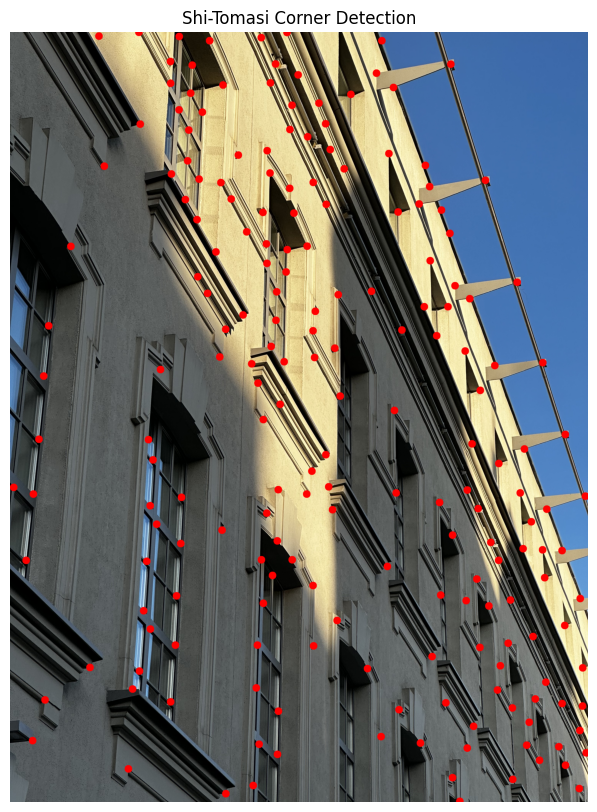

In [47]:
corners = cv2.goodFeaturesToTrack(img_gray, 200, 0.001, 100)
corners = np.int16(corners)

img_result = img_rgb.copy()
for i in corners:
    x, y = i.ravel()
    cv2.circle(img_result, (x, y), 20, 255, -1)

plt.figure(figsize=(10, 10))
plt.imshow(img_result)
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

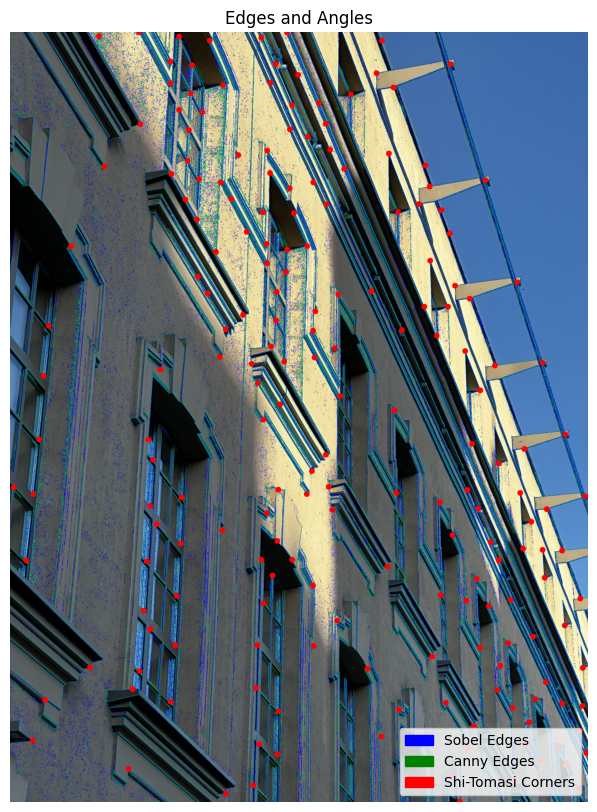

In [72]:
import matplotlib.patches as mpatches

img_result = img_rgb.copy()

# Sobel
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=25)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=25)
sobel_mag = cv2.convertScaleAbs(np.sqrt(grad_x**2 + grad_y**2))
img_result[sobel_mag > 80] = [0, 0, 255]  # Blue

# Canny
edges = cv2.Canny(img_gray, 100, 200)
img_result[edges > 0] = [0, 255, 0]  # Green

# Shi-Tomasi
corners = cv2.goodFeaturesToTrack(img_gray, 200, 0.001, 100)
corners = np.int16(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img_result, (x, y), 15, (255, 0, 0), -1) # Red

# Plt
plt.figure(figsize=(10, 10))
plt.imshow(img_result)
plt.title('Edges and Angles')
plt.axis('off')
plt.legend(handles=[
    mpatches.Patch(color='blue', label='Sobel Edges'),
    mpatches.Patch(color='green', label='Canny Edges'),
    mpatches.Patch(color='red', label='Shi-Tomasi Corners')
], loc='lower right')
plt.show()

```
Оператор Собеля выделил очень много краев и шумов, а вот Canny (с подобранными параметрами) справился лучше, и без постфильтрации
```

---
---

### 5. Морфологические операции:
* Бинаризуйте серое изображение с помощью пороговой сегментации.
* Примените операции эрозии и дилатации с различными структурными элементами.
* Отобразите результаты и объясните эффект каждой операции.


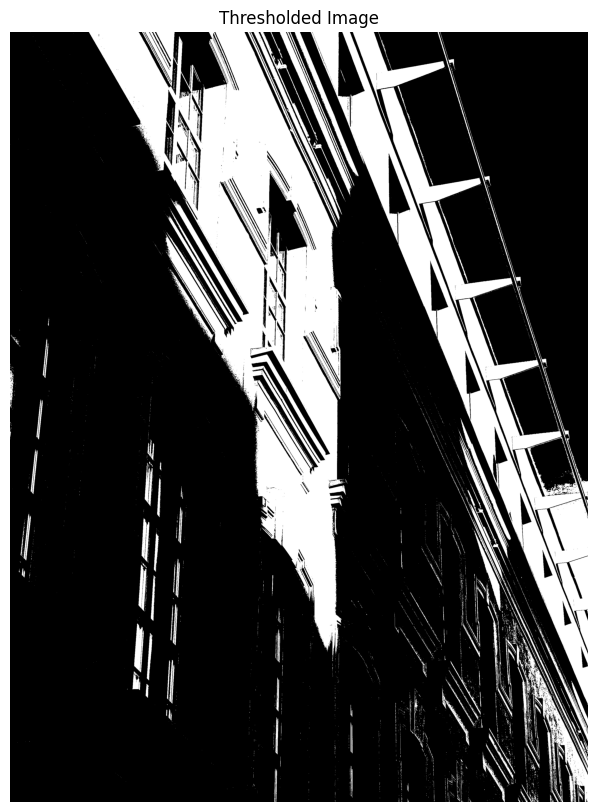

In [12]:
_, img_th = cv2.threshold(img_gray, 126, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 10))

plt.imshow(img_th, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

In [34]:
def sshow(img, name, pos):
    plt.subplot(2, 4, pos)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.figure(figsize=(20, 13))

sshow(img_th, 'Original img', 1)
sshow(img_th, 'Original img', 5)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
rect_erosion = cv2.erode(img_th, rect_kernel, iterations=1)
sshow(rect_erosion, 'Erosion [Rect]', 2)
rect_dilated = cv2.dilate(img_th, rect_kernel, iterations=1)
sshow(rect_dilated, 'Dilated [Rect]', 6)

ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
ellipse_erosion = cv2.erode(img_th, ellipse_kernel, iterations=1)
sshow(ellipse_erosion, 'Erosion [Ellipse]', 3)
ellipse_dilated = cv2.dilate(img_th, ellipse_kernel, iterations=1)
sshow(ellipse_dilated, 'Dilated [Ellipse]', 7)

cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (11, 11))
cross_erosion = cv2.erode(img_th, cross_kernel, iterations=1)
sshow(cross_erosion, 'Erosion [Cross]', 4)
cross_dilated = cv2.dilate(img_th, cross_kernel, iterations=1)
sshow(cross_dilated, 'Dilated [Cross]', 8)

plt.show()



```
Как мы можем видеть: для нашего изображения, где горизонтальные края расположены по диагонали, 
- в операциях эрозии структурный элемент крест справился чуть лучше и оставил чуть меньше дополнительного шума по сравнения с эллипсом и квадратом
- в операциях дилатации также "крест" расширил объекты чуть чище и точнее по своим направлениям, так как крест хорошо подходит для расширений узких и длинных объектов, таких как линии или перекладины, усиливая их по осям (заметно по верхней перекладине).

В контексте операции эрозии:
- квадрат должен уменьшать объекты по периметру
- эллипс должен равномерно уменьшать объекты по направлениям, также уменьшает округлые объекты сохраняя их кривизну 
- крест уменьшает объекты по вертикали и горизонтали

В контексте дилатации:
- квадрат расширяет объекты (и заполняет пропуски) равномерно
- эллипс имеет такой же эффект как и квадрат, но расширяет объекты более плавно
- крест расширяет по осям, хорошо работает на длинных и узких объектах
```